In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class Estacion:
    #Nombre de estacion y conjunto de clases "eventos" dentro de la estacion
    def __init__(self, Nombre):
        self.Nombre = Nombre
        self.Clases = []
        print("Estacion", self.Nombre, "añadida")
        
    def to_dict(self):
        return {
            "Nombre": self.Nombre,
            "Clases": self.Clases
        }

class Labeller:
    #los chiquillos de aumi
    def __init__(self, Nombre):
        self.Nombre = Nombre
        self.Clases = []

        print(self.Nombre, "ha sido añadido")
        
    def to_dict(self):
        return{
            "Nombre": self.Nombre,
            "Clases": self.Clases,
        }

class Clase:
    #los tipos de fonos
    def __init__(self, Nombre, Asignacion):
        self.Nombre = Nombre
        self.Tiempo = 0
        self.Asignacion = Asignacion
        
    def to_dict_e(self):
        return {
            "Estacion": self.Asignacion,
            "Nombre": self.Nombre,
            "Tiempo": self.Tiempo
        }
    
    def to_dict_l(self):
        return {
            "Labeller": self.Asignacion,
            "Nombre": self.Nombre,
            "Tiempo": self.Tiempo
        }
    
clases = []
estaciones = []
labellers = []

In [3]:
#Lectura de datos
df = pd.read_csv("metadata1_4.txt", sep="\t", engine = "python")

est = df.station.unique()
cl = df.kind.unique()
lab = df.labeller.unique()

In [4]:
#Asignacion y creacion de objetos
estaciones.clear()
clases.clear()
labellers.clear()

for e in range(len(est)):
    
    estaciones.append(Estacion(est[e])) 

    
for l in range(len(lab)):
    
    labellers.append(Labeller(lab[l]))

Estacion capta_002 añadida
Estacion capta_004 añadida
Estacion capta_003 añadida
Estacion campus_miraflores añadida
Estacion control_acustico añadida
Hakim_M ha sido añadido
Rafael_P ha sido añadido
Esteban_G ha sido añadido
Cristian_C ha sido añadido
Esteban_V ha sido añadido
Diego_E ha sido añadido


In [5]:
for e in estaciones:
    
    for c in cl:
        
        e.Clases.append(Clase(c, e.Nombre))
        
for l in labellers:
    
    for c in cl:
        
        l.Clases.append(Clase(c, l.Nombre))
        

In [6]:
for i in range(df.shape[0]):
    
    for e in estaciones:
        if(e.Nombre == df.loc[i][4]):
            for c in e.Clases:
                dif = 0
                if(c.Nombre == df.loc[i][3]):
                    
                    dif = df.loc[i][2]-df.loc[i][1]
                    setattr(c, "Tiempo", getattr(c, "Tiempo") + dif)
                    break
            break
 

In [7]:
for i in range(df.shape[0]):
    
    for l in labellers:
        if(l.Nombre == df.loc[i][5]):
            for c in l.Clases:
                dif = 0
                if(c.Nombre == df.loc[i][3]):
                    
                    dif = df.loc[i][2]-df.loc[i][1]
                    setattr(c, "Tiempo", getattr(c, "Tiempo") + dif)

In [8]:
data_e = []
data_l = []

for e in estaciones:
    for c in e.Clases:
        setattr(c,"Tiempo",getattr(c,"Tiempo"))
        data_e.append(c)

for l in labellers:
    for c in l.Clases:
        data_l.append(c)

In [9]:
df_est = pd.DataFrame([d.to_dict_e() for d in data_e])

pd.set_option("display.max_rows", df_est.shape[0]+1)
df_est.groupby(["Estacion","Nombre"])["Tiempo"].apply(sum)

Estacion           Nombre           
campus_miraflores  air_conditioner         0.000000
                   airborne               72.390244
                   alarm                   0.000000
                   bell                    0.000000
                   bird                 1198.966104
                   braking                 0.000000
                   bus_idling             24.780488
                   bus_moving            615.451522
                   car_idling             21.073171
                   car_moving           5021.547043
                   crowd                   0.000000
                   cutting                 0.000000
                   dog                    98.419569
                   drilling                0.000000
                   horn                    4.246140
                   impact                  0.000000
                   motorcycle_idling       0.000000
                   motorcycle_moving       0.000000
                   music   

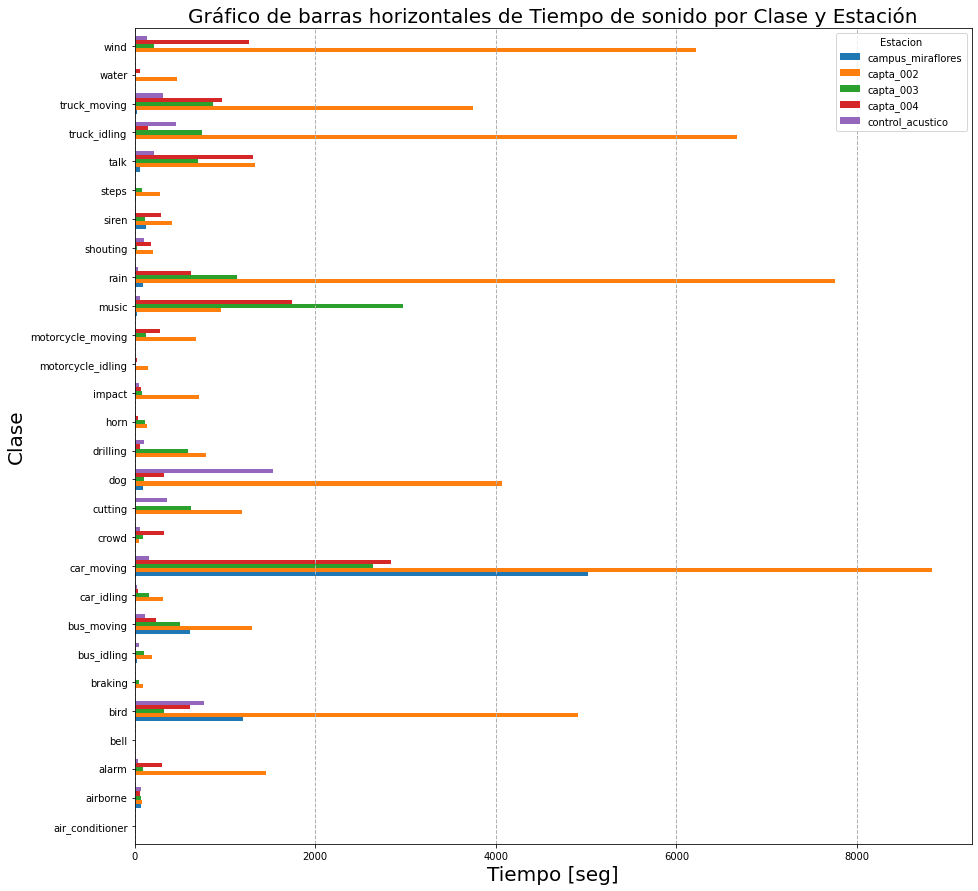

In [10]:
df_est = pd.DataFrame([d.to_dict_e() for d in data_e])


ax = df_est.pivot_table(index="Nombre", columns="Estacion", values="Tiempo").plot.barh(figsize=(15,15), width=0.7, align ="center", subplots=False)


ax.set_title("Gráfico de barras horizontales de Tiempo de sonido por Clase y Estación", fontsize=20)
ax.set_ylabel("Clase", fontsize=20)
ax.set_xlabel("Tiempo [seg]", fontsize=20)
ax.xaxis.grid(linestyle='--', linewidth=1)




# for pY, pX in enumerate(df_est.Tiempo):
#     ax.annotate("{:,}".format(pX), xy=(round(pX),pY/5), fontsize=8, va= "center")

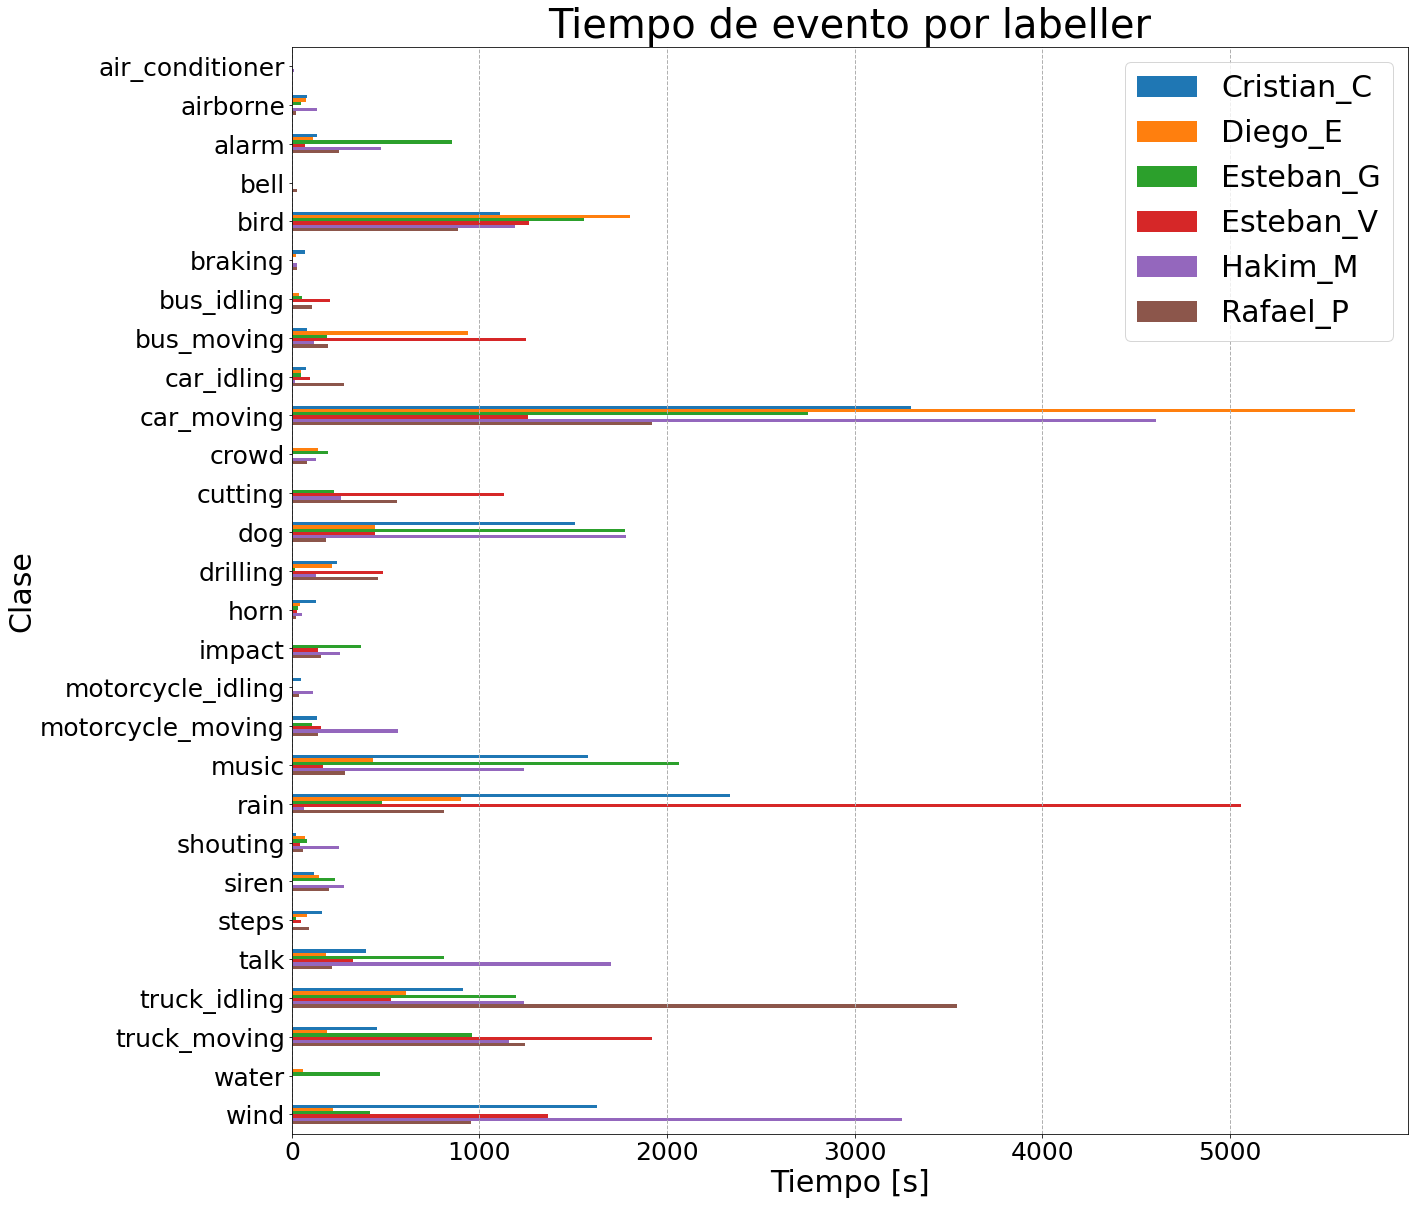

In [11]:
df_lab = pd.DataFrame([l.to_dict_l() for l in data_l])

bx = df_lab.pivot_table(index="Nombre", columns="Labeller", values="Tiempo").plot.barh(linewidth=0.7, figsize=(20,20))


bx.tick_params(axis='both', which='major', labelsize=25)
bx.set_title("Tiempo de evento por labeller", fontsize=40)
bx.set_ylabel("Clase", fontsize=30)
bx.set_xlabel("Tiempo [s]", fontsize=30)
bx.xaxis.grid(linestyle='--', linewidth=1)
plt.legend(loc=1, prop={"size": 30})
bx.invert_yaxis()



